<a href="https://colab.research.google.com/github/erhnk/Churn-Modelling/blob/main/Yapay_Sinir_A%C4%9Flar%C4%B1_%C4%B0le_Model_Kurma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#İki gizli katmandan oluşan bir yapay sinir ağı oluşturalım. Ardından performans değerlendirmesi yapalım.

In [342]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
yapay_siniflandirici = Sequential()

In [328]:
#Birinci Gizli Katman
yapay_siniflandirici.add(Dense(units=6, kernel_initializer='uniform',activation='relu', input_dim = X_train.shape[1]))

#İkinci Gizli Katman
yapay_siniflandirici.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

#Çıktı Katmanı
yapay_siniflandirici.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

#Derleme
yapay_siniflandirici.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

#Parametre seçiminin ardından eğitim setinin yapay sinir ağına uydurulması
history = yapay_siniflandirici.fit(X_train, y_train, batch_size=10,validation_split=0.30 ,epochs= 100)

yapay_y_pred = yapay_siniflandirici.predict(X_test)

Epoch 1/100
490/490 [==============================] - 2s 3ms/step - loss: 0.5544 - accuracy: 0.7815 - val_loss: 0.4414 - val_accuracy: 0.7948
Epoch 2/100
490/490 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.7940 - val_loss: 0.4242 - val_accuracy: 0.7948
Epoch 3/100
490/490 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.8036 - val_loss: 0.4229 - val_accuracy: 0.8281
Epoch 4/100
490/490 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8134 - val_loss: 0.4258 - val_accuracy: 0.8229
Epoch 5/100
490/490 [==============================] - 1s 2ms/step - loss: 0.4171 - accuracy: 0.8229 - val_loss: 0.4222 - val_accuracy: 0.8252
Epoch 6/100
490/490 [==============================] - 1s 2ms/step - loss: 0.4324 - accuracy: 0.8107 - val_loss: 0.4224 - val_accuracy: 0.8200
Epoch 7/100
490/490 [==============================] - 1s 2ms/step - loss: 0.4328 - accuracy: 0.8124 - val_loss: 0.4213 - val_accuracy: 0.8229

In [329]:
print("Yapay sinir ağları için başarı skoru: ",accuracy_score(y_test,yapay_y_pred>0.5))

Yapay sinir ağları için başarı skoru:  0.829


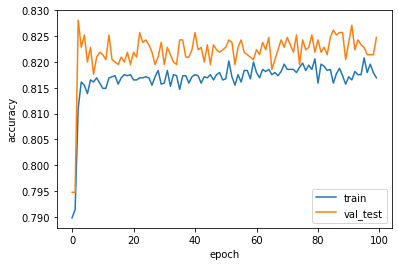

In [330]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','val_test'])

Destek Vektör Makineleri için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


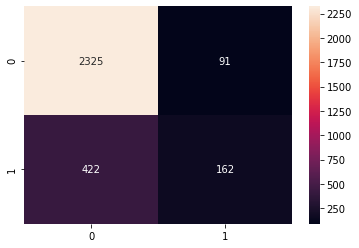

In [331]:
yapay_confusion= sns.heatmap(confusion_matrix(y_test,yapay_y_pred>0.5), annot=True, fmt='g');
print("Destek Vektör Makineleri için confusion_matrix :\n\n",yapay_confusion)

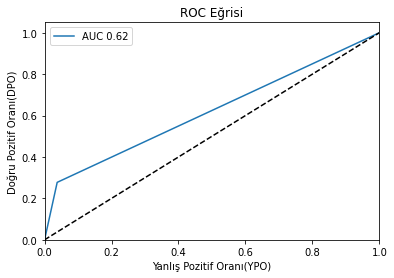

In [332]:
ypo,dpo,esikDeger = roc_curve(y_test,yapay_y_pred>0.5)
aucDegeri = auc(ypo,dpo)
plt.figure()
plt.plot(ypo,dpo,label = "AUC %0.2f" %aucDegeri)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Yanlış Pozitif Oranı(YPO)")
plt.ylabel("Doğru Pozitif Oranı(DPO)")
plt.title("ROC Eğrisi")
plt.legend(loc = "best")
plt.show()

In [333]:
print(classification_report(y_test,yapay_y_pred>0.5))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2416
           1       0.64      0.28      0.39       584

    accuracy                           0.83      3000
   macro avg       0.74      0.62      0.64      3000
weighted avg       0.81      0.83      0.80      3000



Yapay sinir ağları için model tuning

In [322]:
import keras_tuner as kt
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#Elimizdeki yapay sinir ağ modelinin düğüm sayılarını optimize etmek için optimization fonksiyonunu oluşturduk.
#GridSearchCV ile verdiğimiz parametreler arasından isabetlilik skoru en iyi olan parametleri seçtik.
#Ardından o parametreler ile model kurup modelin performansını ölçtük.

In [ ]:
def optimization(nodes1,nodes2,activations):
    yapay_siniflandirici_model1 = Sequential()
    yapay_siniflandirici_model1.add(Dense(units = nodes1,activation=activations,kernel_initializer='uniform', input_dim = X_train.shape[1]))
    yapay_siniflandirici_model1.add(Dropout(0.3))
    yapay_siniflandirici_model1.add(Dense(units = nodes2,activation=activations,kernel_initializer='uniform'))
    yapay_siniflandirici_model1.add(Dropout(0.5))
    yapay_siniflandirici_model1.add(Dense(units= 1,activation='sigmoid',kernel_initializer='glorot_uniform'))
    yapay_siniflandirici_model1.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['accuracy'])
    return yapay_siniflandirici_model1

In [ ]:
yapay_siniflandirici_model1=KerasClassifier(build_fn=optimization, verbose = 0)
parameters={'batch_size':[64,256,512],
            'epochs':[50,100],
            'activations' : ['sigmoid', 'relu'],
            'nodes1': [6,8,7,10,20,40],
            'nodes2': [6,7,8,10,20,40]}
grid_search=GridSearchCV(estimator= yapay_siniflandirici_model1,
                            param_grid=parameters,
                            scoring='accuracy',
                            cv=5)
grid_search=grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

{'activations': 'relu',
 'batch_size': 64,
 'epochs': 100,
 'nodes1': 40,
 'nodes2': 40}

In [ ]:
grid_search.best_score_

0.8525714285714285

En iyi parametreler ile model kurulumu

In [343]:
#Birinci Gizli Katman
yapay_siniflandirici.add(Dense(units=40, kernel_initializer='uniform',activation='relu', input_dim = X_train.shape[1]))

#İkinci Gizli Katman
yapay_siniflandirici.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))

#Çıktı Katmanı
yapay_siniflandirici.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

#Derleme
yapay_siniflandirici.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

#Parametre seçiminin ardından eğitim setinin yapay sinir ağına uydurulması
history1 = yapay_siniflandirici.fit(X_train, y_train, batch_size=64,validation_split=0.30 ,epochs= 100)

yapay_y_pred1 = yapay_siniflandirici.predict(X_test)

Epoch 1/100
77/77 [==============================] - 1s 6ms/step - loss: 0.6373 - accuracy: 0.7886 - val_loss: 0.4725 - val_accuracy: 0.7948
Epoch 2/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.7884 - val_loss: 0.4344 - val_accuracy: 0.7948
Epoch 3/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.8022 - val_loss: 0.4230 - val_accuracy: 0.8271
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8102 - val_loss: 0.4222 - val_accuracy: 0.8243
Epoch 5/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.8210 - val_loss: 0.4197 - val_accuracy: 0.8233
Epoch 6/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.8183 - val_loss: 0.4190 - val_accuracy: 0.8238
Epoch 7/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4294 - accuracy: 0.8117 - val_loss: 0.4171 - val_accuracy: 0.8229
Epoch 8/100
7

Yeni parametreler ile kurulan modelin performans değerlendirmesi

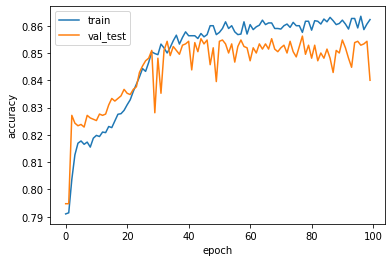

In [344]:
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','val_test'])

In [345]:
print("Yapay sinir ağlarında en iyi parametreler için başarı skoru: ",accuracy_score(y_test,yapay_y_pred1>0.5))

Yapay sinir ağlarında en iyi parametreler için başarı skoru:  0.851


Destek Vektör Makineleri için confusion_matrix :

 AxesSubplot(0.125,0.125;0.62x0.755)


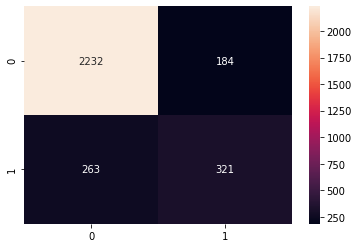

In [346]:
confusion13= sns.heatmap(confusion_matrix(y_test,yapay_y_pred1>0.5), annot=True, fmt='g');
print("Destek Vektör Makineleri için confusion_matrix :\n\n",confusion13)

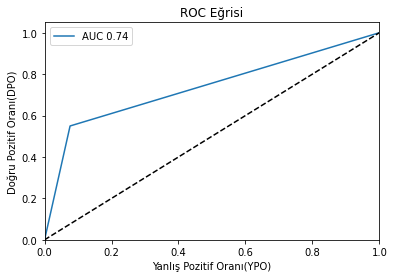

In [347]:
ypo,dpo,esikDeger = roc_curve(y_test,yapay_y_pred1>0.5)
aucDegeri = auc(ypo,dpo)
plt.figure()
plt.plot(ypo,dpo,label = "AUC %0.2f" %aucDegeri)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("Yanlış Pozitif Oranı(YPO)")
plt.ylabel("Doğru Pozitif Oranı(DPO)")
plt.title("ROC Eğrisi")
plt.legend(loc = "best")
plt.show()

In [348]:
print(classification_report(y_test,yapay_y_pred1>0.5))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2416
           1       0.64      0.55      0.59       584

    accuracy                           0.85      3000
   macro avg       0.77      0.74      0.75      3000
weighted avg       0.84      0.85      0.85      3000



In [ ]:
#Parametre optimizasyonun ardından isabetlilik skoru 0.829'dan 0.851'e yükseklmiştir.
#Bununla birlikte doğru sınıflandırma sayısı 2487'den 2553'e yükselmiştir.
#Parametre optimizasyonunun ardından kurulan modelin bankadan ayrılan müşterileri tespit etmede gücünün arttığı görülebilir.
#AUC skoru 0.62'den 0.74'e yükselmiştir.
#Aynı zamandan f1-score 0.39'dan 0.59'a yükselmiştir.